In [30]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (mean_squared_error, r2_score)
from sklearn.dummy import DummyRegressor
import matplotlib.pyplot as plt

# ___Regression Evaluation___
--------------------

In [1]:
# In classification, the consequences of false positives are very different than false negatives.
# These analyses could also be done for regression problems.

# We could anlyze regression model's poerformance by calculating instances where the predictions were larger than the true value 
# and where the predictions were smaller than the true value.

# However, for most regression problems differentiating between these two errors are not as important.
# This simplifies evaluation of regression models quite a bit.
# In most cases, the default R2 score (accuracy score) is adequate for most tasks.
# R2 for a perfect predictor -> 1.0
# R2 for a constant predictor -> 0.0

In [2]:
# R2 score has the potential to become negative in certain cases of bad model fits.
# There are some alternative metrics for evaluating regression models that work a little different than R2 score.

# 1) mean_absolute_error -> absolute difference between target & prediction
# 2) mean_squared_error -> squared difference between target & prediction
# 3) median_absolute_error -> less sensitive to outliers

In [3]:
# Dummy regressors 

# Dummy regressors can give simple and useful baselines to compare against regressors.
# Dummy regressors make predictions based on simple criteria without actually looking at the training data.

In [5]:
diabetes = load_diabetes()

In [9]:
diabetes.data.shape

(442, 10)

In [13]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [21]:
x = diabetes.data[:, 6].reshape(-1, 1)

In [22]:
train_x, test_x, train_y, test_y = train_test_split(x, diabetes.target, train_size = 0.8)

In [24]:
linReg = LinearRegression().fit(train_x, train_y)
dmmyReg = DummyRegressor(strategy = "mean").fit(train_x, train_y)

In [25]:
preds_linreg = linReg.predict(test_x)
preds_dummy = dmmyReg.predict(test_x)

In [26]:
mean_squared_error(test_y, preds_linreg)

6242.103220039316

In [27]:
mean_squared_error(test_y, preds_dummy)

6280.960298645623

In [28]:
r2_score(test_y, preds_linreg)

0.0026356445966945197

In [29]:
r2_score(test_y, preds_dummy)

-0.003572946288604939

In [ ]:
# If we compare the linear regressor and the dummy regressor, they both have equally poor performance.

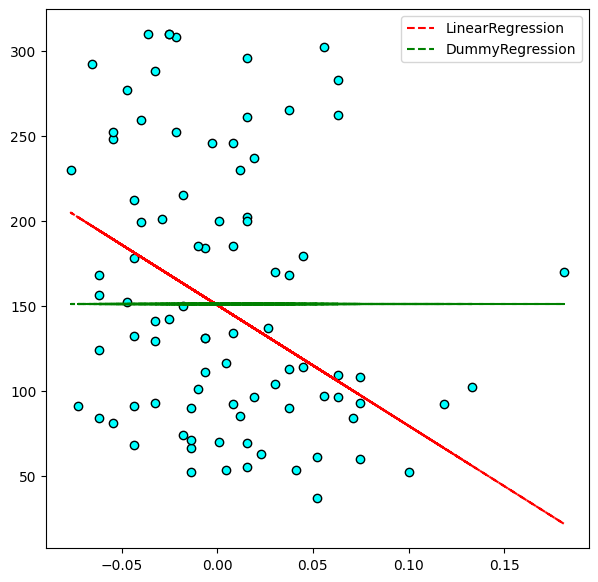

In [42]:
fig, axes = plt.subplots()
fig.set_size_inches(7, 7)

axes.scatter(test_x, test_y, ec = "black", color = "cyan")
axes.plot(test_x, preds_linreg, color = "red", linestyle = "--", label = "LinearRegression")
axes.plot(test_x, preds_dummy, color = "green", linestyle = "--", label = "DummyRegression")
axes.legend()

plt.show()

In [ ]:
# Strategies available for dummy regressors;
# 1) mean
# 2) median
# 3) quantile
# 4) constant